<a href="https://colab.research.google.com/github/sruthib22/DS601_Fall21/blob/main/Mid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import matplotlib.pyplot as plt
#TO PLOT DATA 
import plotly.graph_objects as go
import descartes
import geopandas as gpd
#evaluating the dataset based on longitude and latitude
#importing libraries related to mapping
from shapely.geometry import Point,Polygon
from io import StringIO
import seaborn as sns
import pandas as pd
import os

In [2]:
df = pd.read_excel('https://query.data.world/s/5oe3dbxvi32bg7sttkklujtas47cc5')

In [3]:
df

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Yes,"Abdulazeez ""had suffered for years from depres...",Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,No,NaN,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,No,NaN,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,8,20,Military,Yes,Had told Rhode Island police the prior month t...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Shopping centers spree killings,Male,Spree,White,"Palm Bay, Florida",Florida,4/23/1987,1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,Yes,He suffered from paranoid delusions. A judge f...,Yes,"Gun store in Norwood, Ohio; The Oaks Trading P...","One rifle, one revolver, one shotgun",3,No,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,28.033188,-80.642967
67,United States Postal Service shooting,Male,Mass,White,"Edmond, Oklahoma",Oklahoma,8/20/1986,1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,Yes,He was worried he had inherited mental problem...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,3,No,".22-caliber, two .45-caliber Colt Model 1911-A...",http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,35.667202,-97.429367
68,San Ysidro McDonald's massacre,Male,Mass,White,"San Ysidro, California",California,7/18/1984,1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,Yes,"The day before the shooting, he tried to make ...",Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",3,Yes,9mm Browning P35 Hi-Power semiautomatic handgu...,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,32.552002,-117.043083
69,Dallas nightclub shooting,Male,Mass,White,"Dallas, Texas",Texas,6/29/1984,1984,"Abdelkrim Belachheb, 39,

#### cleaning data

In [5]:
df.isna().sum

<bound method DataFrame.sum of      CASE  GENDER  SHOOTINGTYPE  ...  MENTALHEALTHSOURCES  LATITUDE  LONGITUDE
0   False   False         False  ...                 True     False      False
1   False   False         False  ...                 True     False      False
2   False   False         False  ...                False     False      False
3   False   False         False  ...                 True     False      False
4   False   False         False  ...                False     False      False
..    ...     ...           ...  ...                  ...       ...        ...
66  False   False         False  ...                False     False      False
67  False   False         False  ...                False     False      False
68  False   False         False  ...                False     False      False
69  False   False         False  ...                False     False      False
70  False   False         False  ...                False     False      False

[71 rows x 25 column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CASE                       71 non-null     object 
 1   GENDER                     71 non-null     object 
 2   SHOOTINGTYPE               71 non-null     object 
 3   RACE                       71 non-null     object 
 4   LOCATION                   71 non-null     object 
 5   STATE                      71 non-null     object 
 6   DATE                       71 non-null     object 
 7   YEAR                       71 non-null     int64  
 8   SUMMARY                    71 non-null     object 
 9   FATALITIES                 71 non-null     int64  
 10  WOUNDED                    71 non-null     int64  
 11  TOTALVICTIMS               71 non-null     int64  
 12  LOCATIONTYPE               71 non-null     object 
 13  PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 

In [7]:
df.describe()

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,NUMWEAPONS,LATITUDE,LONGITUDE
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2002.112676,8.042254,7.225352,15.267606,2.197183,37.815320,-96.953730
std,9.337404,5.349063,9.859292,12.681773,1.508260,6.074233,18.837319
min,1982.000000,4.000000,0.000000,5.000000,1.000000,21.325512,-157.847305
25%,1993.500000,5.000000,1.000000,7.000000,1.000000,33.745138,-117.750736
50%,2005.000000,6.000000,3.000000,11.000000,2.000000,38.583385,-90.668259
75%,2011.000000,8.500000,8.000000,18.500000,3.000000,41.915030,-81.149307
max,2015.000000,33.000000,58.000000,70.000000,9.000000,48.050823,-71.072830


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


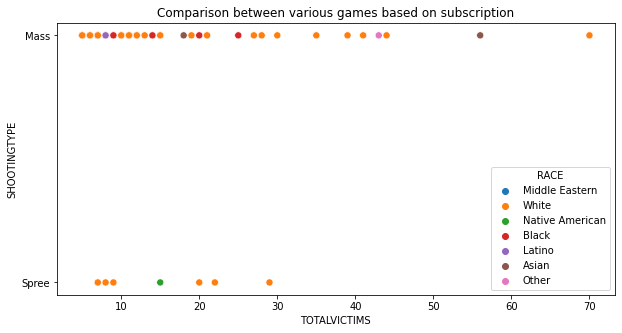

In [10]:
#plotting data 

plt.figure(figsize=(10,5))
plt.title('Comparison between various games based on subscription')
sns.scatterplot(df['TOTALVICTIMS'],df['SHOOTINGTYPE'],hue =df['RACE'],s=50)

In [14]:
#EVALUATION BASED ON SHOOTING TYPE 
shooting_type = df[['SHOOTINGTYPE','FATALITIES','WOUNDED','TOTALVICTIMS']]

In [15]:
shooting_type

,SHOOTINGTYPE,FATALITIES,WOUNDED,TOTALVICTIMS
0,Mass,5,2,7
1,Mass,9,1,10
2,Mass,5,1,6
3,Mass,4,2,6
4,Mass,12,8,20
...,...,...,...,...
66,Spree,6,14,20
67,Mass,15,6,21
68,Mass,22,19,41
69,Mass,6,1,7


In [16]:
shooting_type.groupby('SHOOTINGTYPE').sum()

,FATALITIES,WOUNDED,TOTALVICTIMS
SHOOTINGTYPE,,,
Mass,517,450,967
Spree,54,63,117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


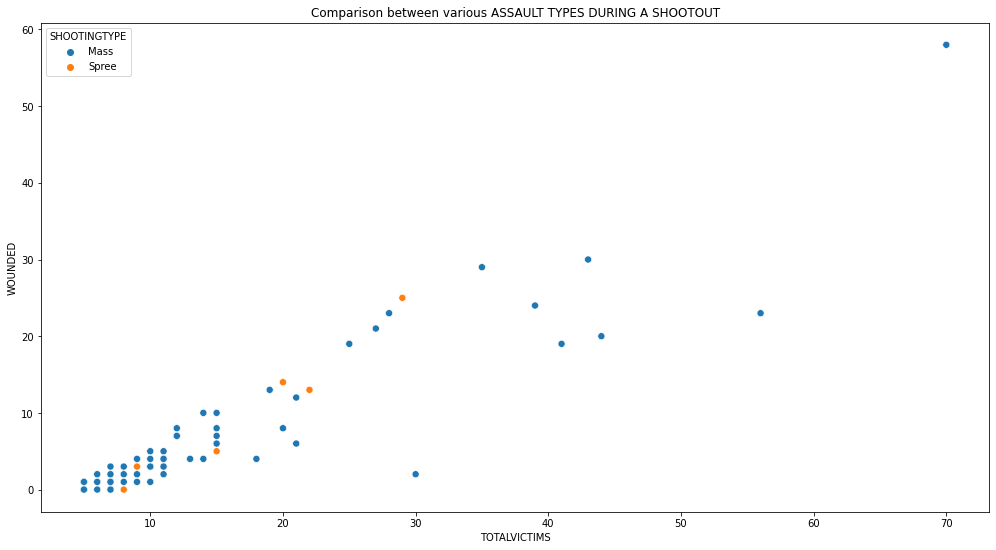

In [20]:
# VISUALIZING HOW MANY PEOPLE WERE WOUNDED BASED ON THE SHOOTING TYPE
plt.figure(figsize=(17,9))
plt.title('Comparison between various ASSAULT TYPES DURING A SHOOTOUT')
sns.scatterplot(shooting_type['TOTALVICTIMS'],shooting_type['WOUNDED'],hue =shooting_type['SHOOTINGTYPE'],s=50)

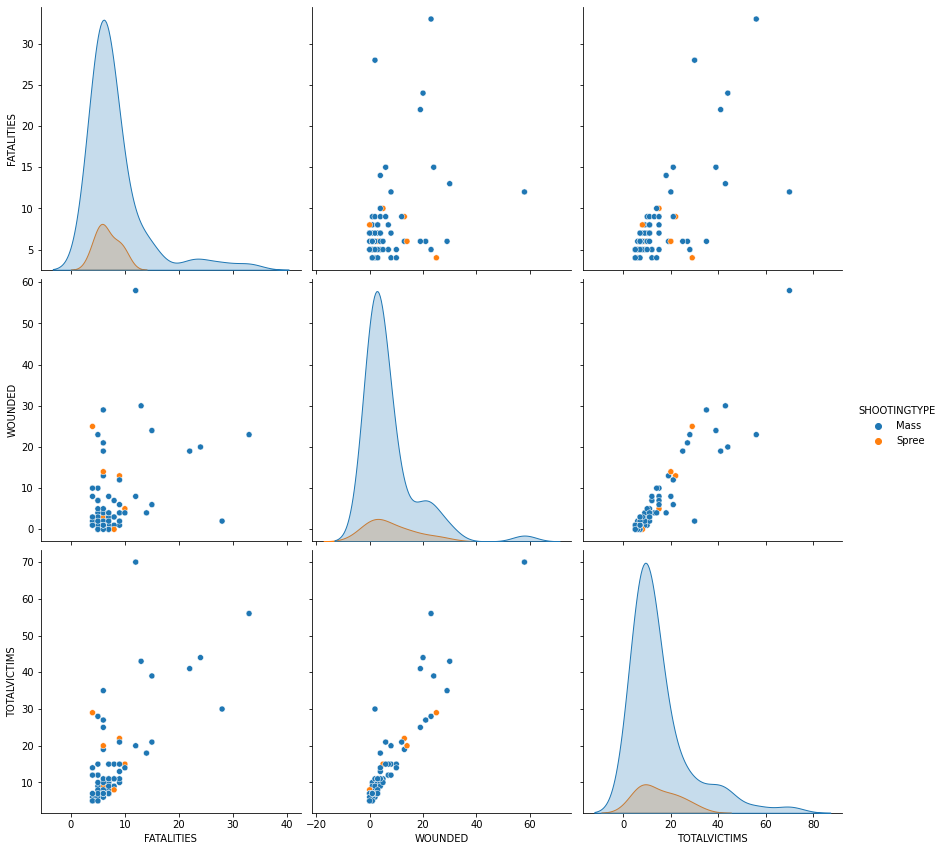

In [21]:
sns.pairplot(shooting_type,hue='SHOOTINGTYPE',height=4)

In [53]:
#EVALUATION OF SHOOTINGS BASED ON STATE
location_type = df[['SHOOTINGTYPE','FATALITIES','WOUNDED','TOTALVICTIMS','STATE','LOCATION']]

In [54]:
location_type

,SHOOTINGTYPE,FATALITIES,WOUNDED,TOTALVICTIMS,STATE,LOCATION
0,Mass,5,2,7,Tennessee,"Chattanooga, Tennessee"
1,Mass,9,1,10,South Carolina,"Charleston, South Carolina"
2,Mass,5,1,6,Washington,"Marysville, Washington"
3,Mass,4,2,6,California,"Alturas, California"
4,Mass,12,8,20,D.C.,"Washington, D.C."
...,...,...,...,...,...,...
66,Spree,6,14,20,Florida,"Palm Bay, Florida"
67,Mass,15,6,21,Oklahoma,"Edmond, Oklahoma"
68,Mass,22,19,41,California,"San Ysidro, California"
69,Mass,6,1,7,Texas,"Dallas, Texas"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



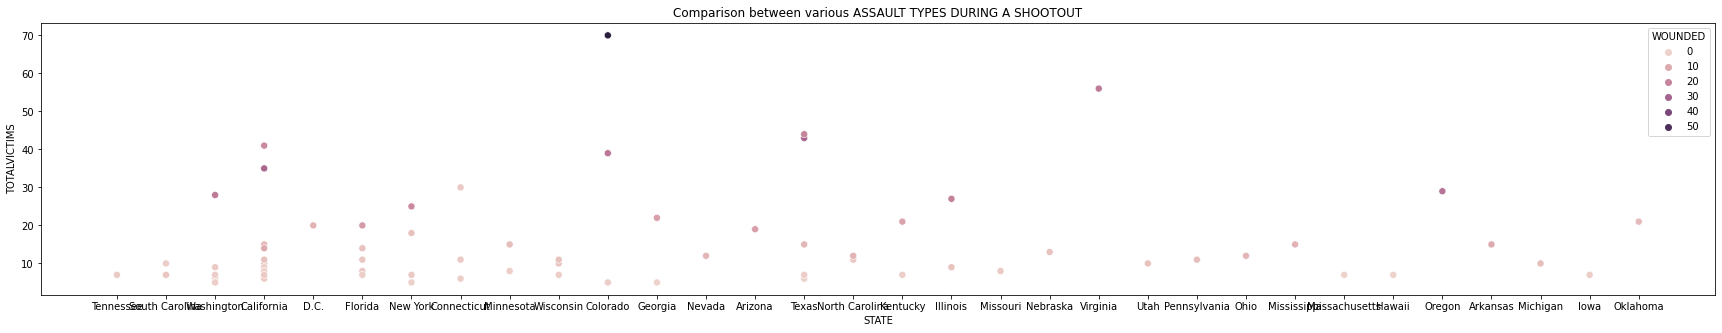

In [55]:
plt.figure(figsize=(30,5))
plt.title('Comparison between various ASSAULT TYPES DURING A SHOOTOUT')
sns.scatterplot(location_type['STATE'],location_type['TOTALVICTIMS'],hue =location_type['WOUNDED'],s=50)

In [57]:
new_location = location_type.groupby(['LOCATION']).sum()
new_location

,FATALITIES,WOUNDED,TOTALVICTIMS
LOCATION,,,
"Aiken, South Carolina",4,3,7
"Alturas, California",4,2,6
"Atlanta, Georgia",9,13,22
"Aurora, Colorado",16,59,75
"Binghamton, New York",14,4,18
...,...,...,...
"Tampa, Florida",5,3,8
"Tucson, Arizona",6,13,19
"Wakefield, Massachusetts",7,0,7


In [68]:
fig = go.Figure()

trace_0 = go.Bar(
    x = location_type['STATE'],
    y = location_type['TOTALVICTIMS'],
    #mode = 'markers'
    #mode = 'markers+lines'
)

fig.add_trace(trace_0)

fig.update_layout(
    title = 'people subjected to various crimes',
    xaxis = {'title':'STATE'},
    yaxis = {'title':'victims'}
)

fig.show()

In [30]:
location_type.groupby(['STATE','SHOOTINGTYPE']).sum()

FATALITIES  WOUNDED  TOTALVICTIMS
STATE          SHOOTINGTYPE                                   
Arizona        Mass                   6       13            19
Arkansas       Mass                   5       10            15
California     Mass                  72       76           148
               Spree                 14        3            17
Colorado       Mass                  31       83           114
Connecticut    Mass                  42        5            47
D.C.           Mass                  12        8            20
Florida        Mass                  36       11            47
               Spree                  6       14            20
Georgia        Mass                   5        0             5
               Spree                  9       13            22
Hawaii         Mass                   7        0             7
Illinois       Mass                  11       25            36
Iowa           Mass                   6        1             7
Kentucky       Mass                  15       13            28
Massachusetts  Mass                   7        0             7
Michigan       Mass                   5        5            10
Minnesota      Mass                   7        1             8
               Spree                 10        5            15
Mississippi    Mass                   7        8            15
Missouri       Mass                   6        2             8
Nebraska       Mass                   9        4            13
Nevada         Mass                   5        7            12
New York       Mass                  25       23            48
               Spree                  5        2             7
North Carolina Mass                  12       11            23
Ohio           Mass                   5        7            12
Oklahoma       Mass                  15        6            21
Oregon         Spree                  4       25            29
Pennsylvania   Mass                   6        5            11
South Carolina Mass                  13        4            17
Tennessee      Mass                   5        2             7
Texas          Mass                  57       58           115
Utah           Mass                   6        4            10
Virginia       Mass                  33       23            56
Washington     Mass                  26       27            53
               Spree                  6        1             7
Wisconsin      Mass                  20        8            28

In [86]:
location_type.describe()

,FATALITIES,WOUNDED,TOTALVICTIMS
count,71.000000,71.000000,71.000000
mean,8.042254,7.225352,15.267606
std,5.349063,9.859292,12.681773
min,4.000000,0.000000,5.000000
25%,5.000000,1.000000,7.000000
50%,6.000000,3.000000,11.000000
75%,8.500000,8.000000,18.500000
max,33.000000,58.000000,70.000000


##### evaluating the shooting type for every state


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



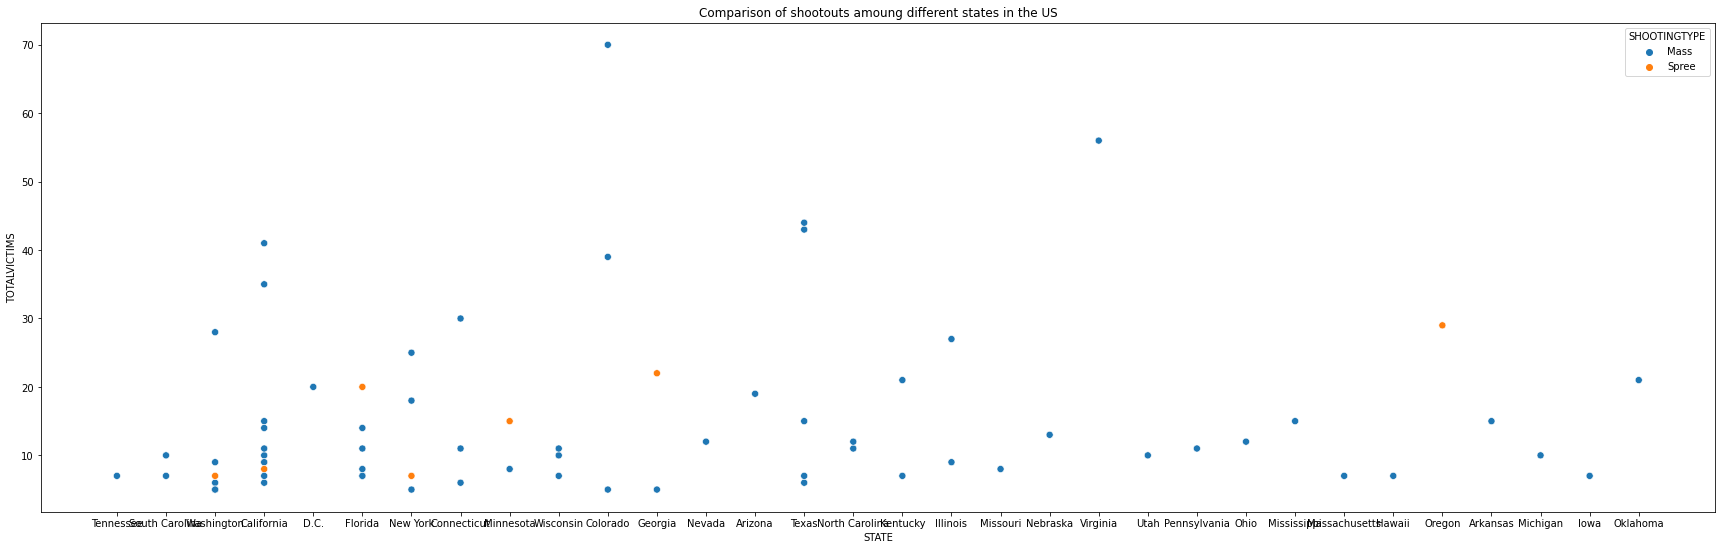

In [72]:
plt.figure(figsize=(30,9))
plt.title('Comparison of shootouts amoung different states in the US')
sns.scatterplot(location_type['STATE'],location_type['TOTALVICTIMS'],hue =location_type['SHOOTINGTYPE'],s=50)

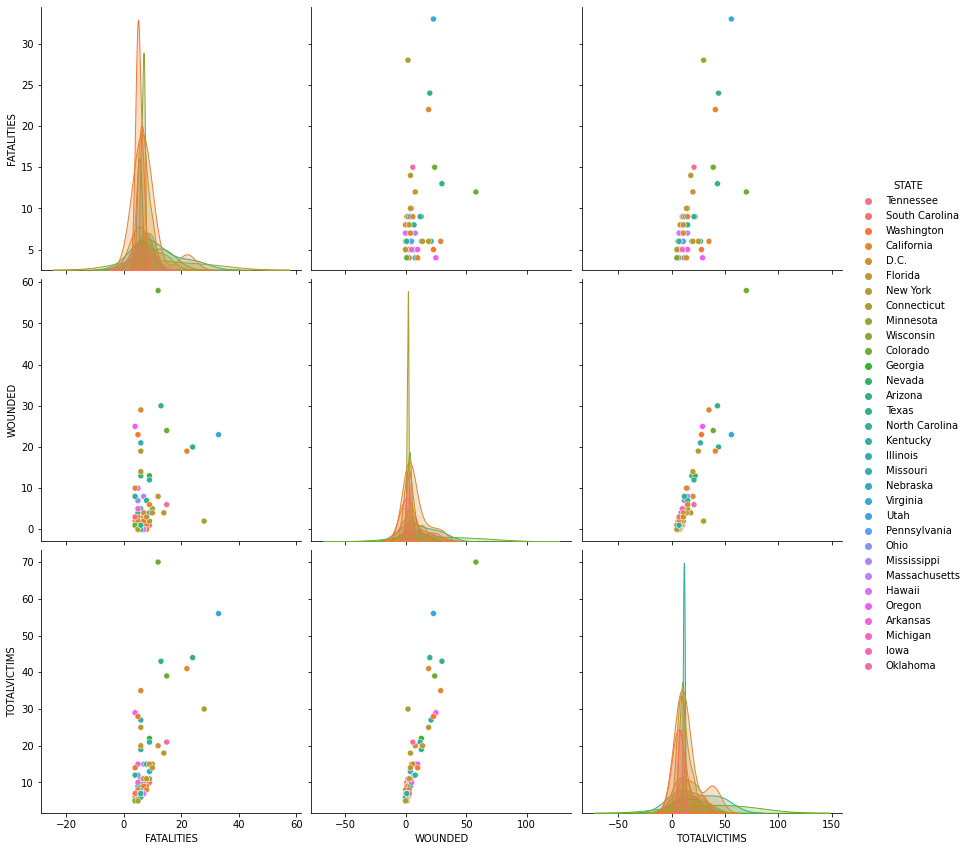

In [74]:
sns.pairplot(location_type,hue='STATE',height=4)

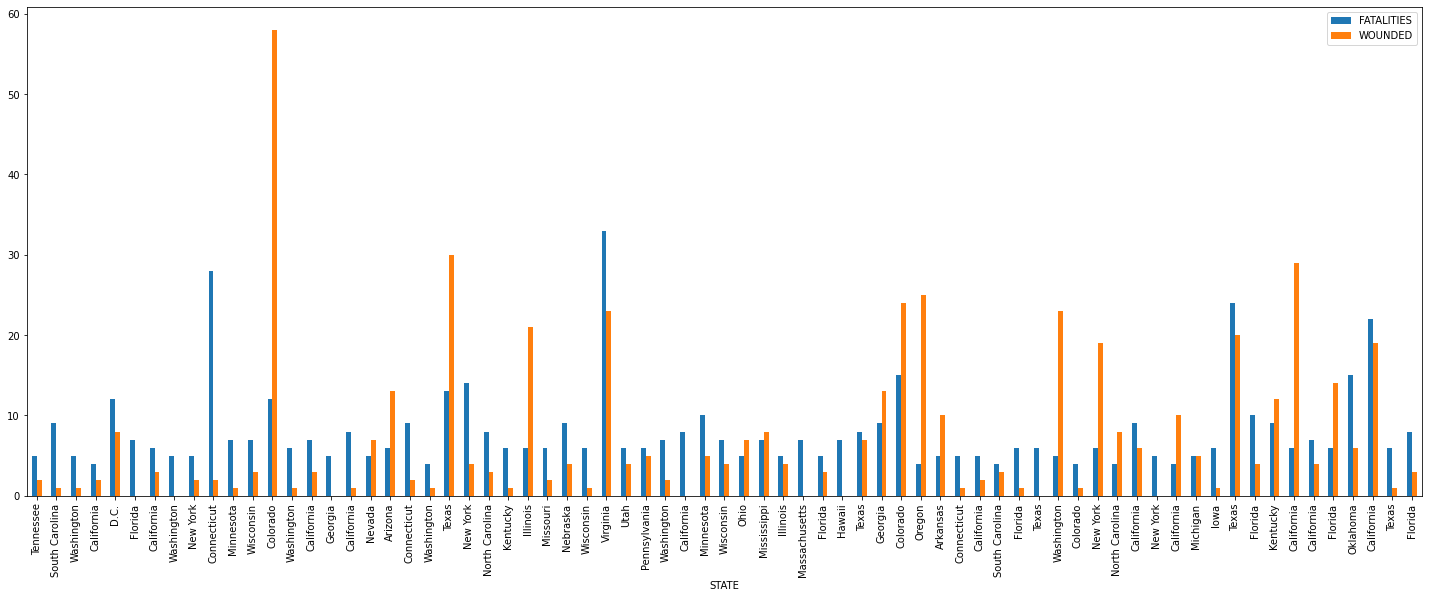

In [95]:
location_type.plot(kind = 'bar', x= 'STATE', y=['FATALITIES','WOUNDED'], figsize = (25,9));

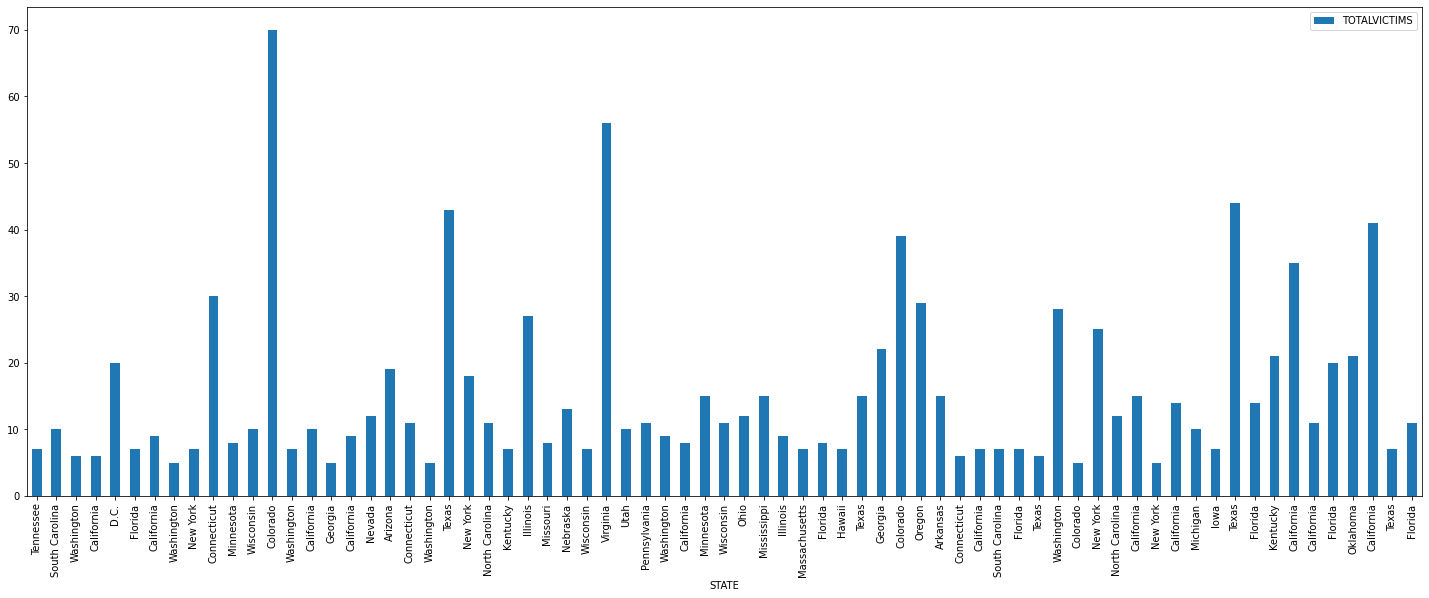

In [96]:
location_type.plot(kind = 'bar', x= 'STATE', y='TOTALVICTIMS', figsize = (25,9));

In [99]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 7.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 6.1 MB/s 


In [106]:
map_info = df[['LATITUDE','LONGITUDE','STATE','TOTALVICTIMS']]

In [107]:
map_info

,LATITUDE,LONGITUDE,STATE,TOTALVICTIMS
0,35.047157,-85.311821,Tennessee,7
1,32.788387,-79.933144,South Carolina,10
2,48.050823,-122.176918,Washington,6
3,41.487103,-120.542236,California,6
4,38.874981,-76.994530,D.C.,20
...,...,...,...,...
66,28.033188,-80.642967,Florida,20
67,35.667202,-97.429367,Oklahoma,21
68,32.552002,-117.043083,California,41
69,32.780106,-96.800011,Texas,7


In [150]:
#map_info.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", c="TOTALVICTIMS",colormap="YlOrRd")

In [113]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [151]:
#countries.plot(color="lightgrey")

In [152]:
#countries[countries["name"] == "United States of America"].plot(color="lightgrey")

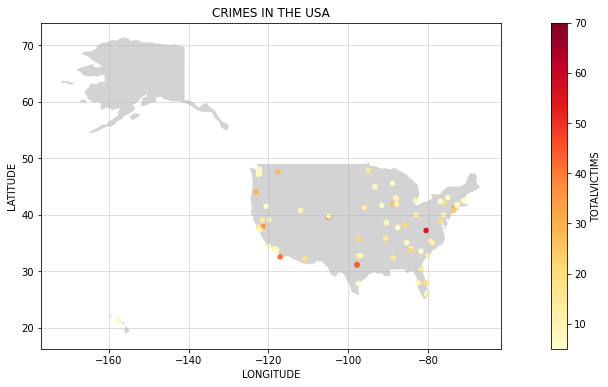

In [117]:
# initializing the axis
fig, ax = plt.subplots(figsize=(18,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",
                                                 ax=ax)
# plot points
map_info.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", 
        c="TOTALVICTIMS", colormap="YlOrRd", 
        title="CRIMES IN THE USA", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [124]:
## Evaluating the data based on the RACE of people in the USA
race_info = df[['RACE','MENTALHEALTHNOTES','TOTALVICTIMS','WOUNDED','FATALITIES','SHOOTINGTYPE']]
race_info

,RACE,MENTALHEALTHNOTES,TOTALVICTIMS,WOUNDED,FATALITIES,SHOOTINGTYPE
0,Middle Eastern,"Abdulazeez ""had suffered for years from depres...",7,2,5,Mass
1,White,NaN,10,1,9,Mass
2,Native American,"Fryberg was well-liked and allegedly happy, bu...",6,1,5,Mass
3,Native American,NaN,6,2,4,Mass
4,Black,Had told Rhode Island police the prior month t...,20,8,12,Mass
...,...,...,...,...,...,...
66,White,He suffered from paranoid delusions. A judge f...,20,14,6,Spree
67,White,He was worried he had inherited mental problem...,21,6,15,Mass
68,White,"The day before the shooting, he tried to make ...",41,19,22,Mass
69,White,"During his last meal with his wife, he confess...",7,1,6,Mass


In [125]:
race_info['MENTALHEALTHNOTES'].isna().sum

<bound method Series.sum of 0     False
1      True
2     False
3      True
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Name: MENTALHEALTHNOTES, Length: 71, dtype: bool>

In [126]:
race_info.dropna()

,RACE,MENTALHEALTHNOTES,TOTALVICTIMS,WOUNDED,FATALITIES,SHOOTINGTYPE
0,Middle Eastern,"Abdulazeez ""had suffered for years from depres...",7,2,5,Mass
2,Native American,"Fryberg was well-liked and allegedly happy, bu...",6,1,5,Mass
4,Black,Had told Rhode Island police the prior month t...,20,8,12,Mass
5,Latino,His mother told authorities her son had been a...,7,0,7,Mass
6,White,He was known as a solitary teen who regularly ...,9,3,6,Spree
...,...,...,...,...,...,...
66,White,He suffered from paranoid delusions. A judge f...,20,14,6,Spree
67,White,He was worried he had inherited mental problem...,21,6,15,Mass
68,White,"The day before the shooting, he tried to make ...",41,19,22,Mass
69,White,"During his last meal with his wife, he confess...",7,1,6,Mass


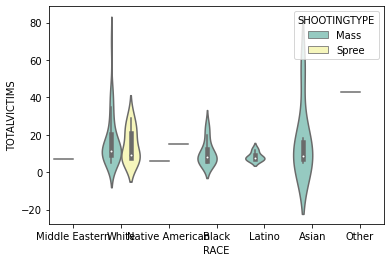

In [138]:
ax = sns.violinplot(x="RACE", y="TOTALVICTIMS", hue="SHOOTINGTYPE", palette="Set3", data=race_info)

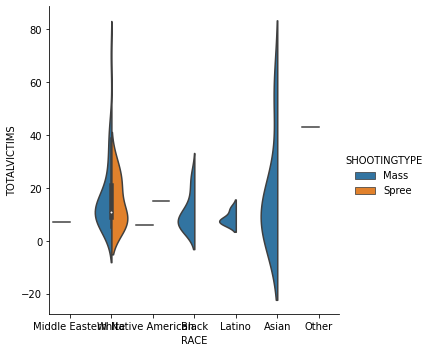

In [149]:
new_ax = sns.catplot(x="RACE", y="TOTALVICTIMS", hue="SHOOTINGTYPE", data=race_info, kind="violin", split=True);

##### IT CAN BE OBSERVED THAT THE NUMBER OF VICTIMS WHO WERE WOUNDED IS MAXIMUM IN THE STATE OF COLORADO WHEREAS THE NUMBER OF FATATL INJURIES WERE MAXIMUM REPORTED IN VIRGINIA AND THE MAXIMUM NUMBER OF TOTAL VICTIMS ARE IN COLORADO

#### from the above analysis we can understand that the most affected citizens during a shootout in the USA is ASIANS and Mass attacks happened on  whites 

#### THE MAXIMUM NUMBER OF VICTIMS RANGE BETWEEN -100 TO -80 LONGITUDE AND BETWEEN 30 TO 40

#### TOTAL NUMBER OF VICTIMS ARE REPORTED MAXIMUM IN CALIFORNIA 
